In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score
#import en_core_web_sm

In [3]:
#reading file
df=pd.read_csv("C:/Users/anups/Downloads/datasets_39657_61725_amazon_alexa(3).csv", sep=",")
type(df['date'])

pandas.core.series.Series

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.shape


(3150, 5)

In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df.isna().mean(axis=0)


rating              0.0
date                0.0
variation           0.0
verified_reviews    0.0
feedback            0.0
dtype: float64

In [8]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

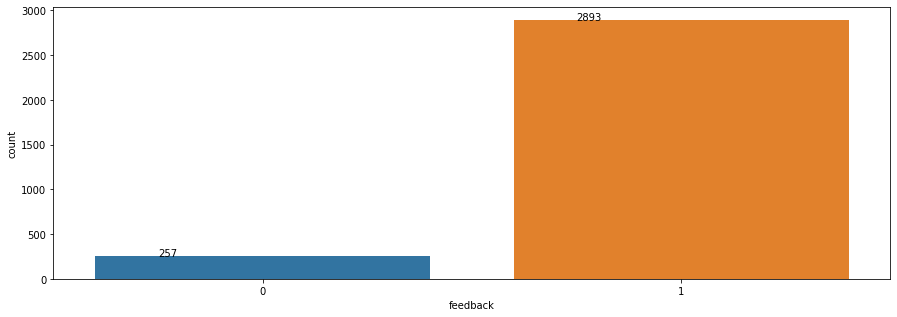

In [9]:
plt.figure(figsize=(15,5))
ax=sns.countplot(data=df,x='feedback');
#for p, label in zip(ax.patches, df["feedback"].value_counts().index):
 #   ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [10]:
df['feedback'].mean()

0.9184126984126985

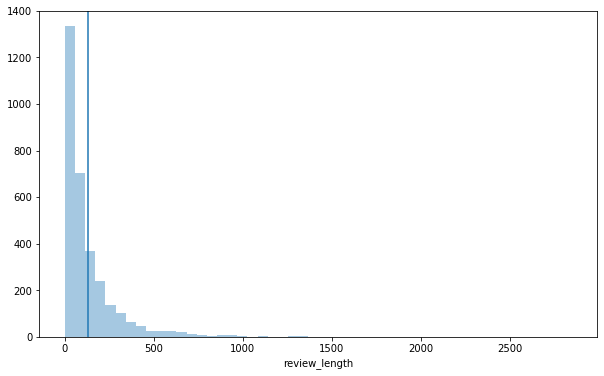

In [11]:
#seeing the distribution of word length
df['review_length']=df['verified_reviews'].apply(len)

fig = plt.figure(1, figsize=(10,6))
sns.distplot(df['review_length'],kde=False);
plt.axvline(x=df['review_length'].mean(), ymin=0,ymax=1);

In [12]:
df['review_length'].mean()

132.0495238095238

In [13]:
df['date']=pd.to_datetime(df['date'], format="%d-%b-%y")
df.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            object
feedback                     int64
review_length                int64
dtype: object

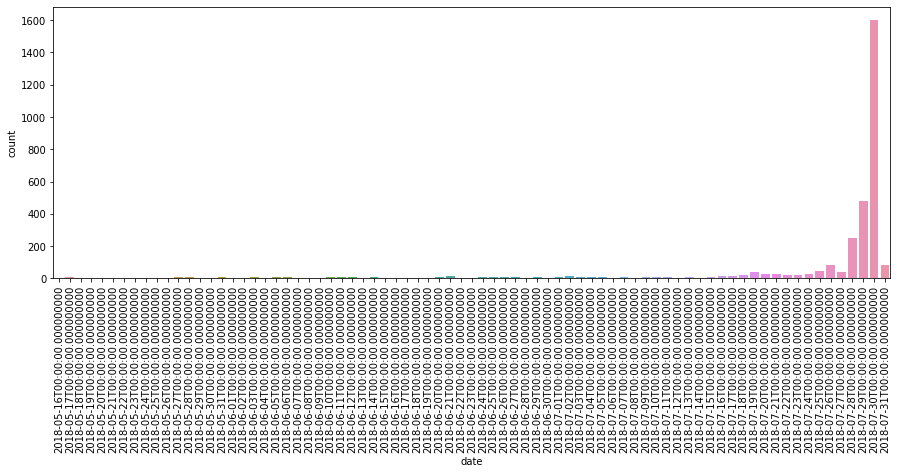

In [14]:

plt.figure(figsize=(15,5))
ax=sns.countplot(df['date'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

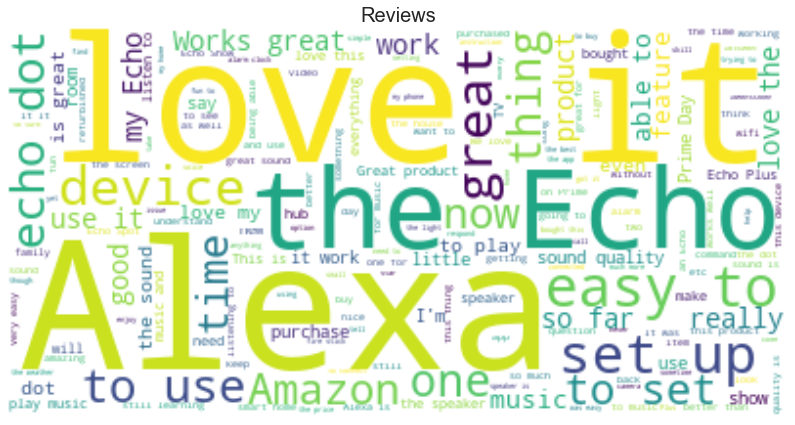

In [15]:
np.random.seed(10)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(df['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

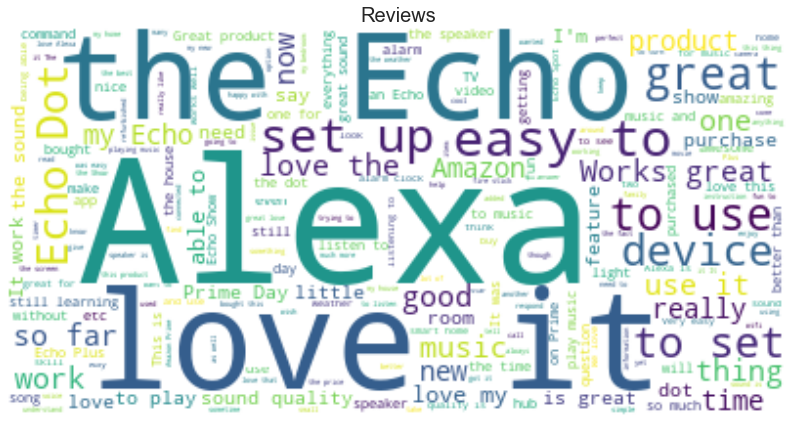

In [17]:
df_positive=df[df['feedback']==1]
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(df_positive['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

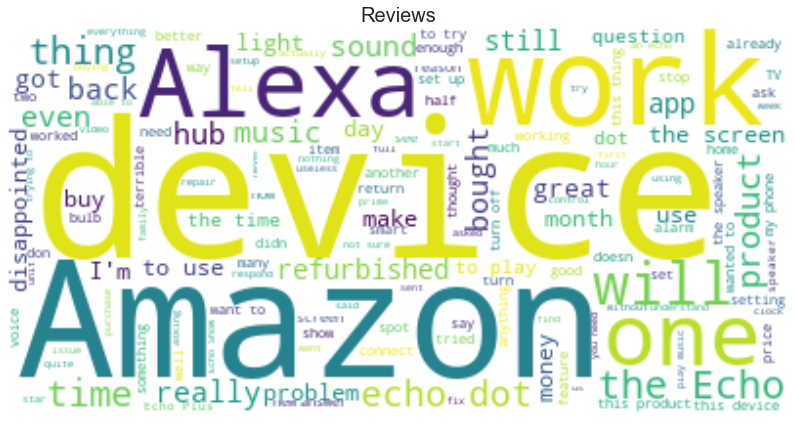

In [18]:
df_negative=df[df['feedback']==0]
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(df_negative['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

In [19]:
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()

In [20]:
def data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_!='-PRON-':
            temp=token.lemma_.lower().strip()
        else:
            temp=token.lower_
        tokens.append(temp)
            
    cleaned_tokens=[]
    for token in tokens:
        if token not in stop_words and token not in punctuations:
            cleaned_tokens.append(token)
    
    return cleaned_tokens

In [27]:
from sklearn.svm import LinearSVC

In [28]:
tfidf_vector = TfidfVectorizer(tokenizer = data_cleaning,ngram_range=(1,2))

In [29]:
classifier=LinearSVC()
X=df['verified_reviews']
y=df['feedback']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [25]:
pipe = Pipeline([('tfidf', tfidf_vector),
                 ('clf', classifier)])

In [33]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x000001FCD31A2798>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=

In [37]:
predicted = pipe.predict(X_test)

In [35]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.88      0.30      0.45        76
           1       0.94      1.00      0.97       869

    accuracy                           0.94       945
   macro avg       0.91      0.65      0.71       945
weighted avg       0.94      0.94      0.93       945



In [36]:
confusion_matrix(y_test,predicted)

array([[ 23,  53],
       [  3, 866]], dtype=int64)

In [38]:
pipe.predict(['return'])

array([0], dtype=int64)

In [39]:
X_test


1369    Thank God, and alarm clock with an lcd that ge...
1882    The Echoplus is a great extension for the Echo...
2422    The installation and connection to my Wi-Fi wa...
1126    With the combination of this, smart plugins, a...
1767    We love our Echo Plus. We like listening to mu...
                              ...                        
1104    As an Alexa device, it works just as well as a...
1665    I love it!  I wanted it primarily for the kitc...
1219    This product has made my life much simpler wit...
2711    I love my new Echo Dot! Right now, I mainly us...
2445    Excellent product and service.  Very easy to i...
Name: verified_reviews, Length: 945, dtype: object

In [40]:
# Number of data points in the minority class
number_records_negative = len(df[df['feedback']==0])
negative_indices = np.array(df[df['feedback']==0].index)


# Picking the indices of the normal classes
positive_indices = df[df['feedback']==1].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_positive_indices = np.random.choice(positive_indices, number_records_negative, replace = False)
random_positive_indices = np.array(random_positive_indices)
random_positive_indices.shape

(257,)

In [48]:
# Appending the 2 indices
under_sample_indices = np.concatenate([negative_indices,random_positive_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

In [42]:

X_undersample = under_sample_data.ix[:, under_sample_data.columns == 'verified_reviews']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'feedback']

# Showing ratio
print("Percentage of postive sentiments: ", len(under_sample_data[under_sample_data.feedback == 1])/len(under_sample_data))
print("Percentage of negative sentiments: ", len(under_sample_data[under_sample_data.feedback == 0])/len(under_sample_data))
print("Total number of sentiments in resampled data: ", len(under_sample_data))

AttributeError: 'DataFrame' object has no attribute 'ix'

In [44]:
X_undersample = df['verified_reviews'].iloc[:,]
y_undersample = df['feedback'].iloc[:,]

In [45]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_undersample,y_undersample,test_size = 0.25, random_state = 0)


In [46]:
pipe.fit(X_train_new,y_train_new)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x000001FCD31A2798>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=

In [47]:
predicted = pipe.predict(X_test_new)
print(classification_report(y_test_new,predicted))

              precision    recall  f1-score   support

           0       0.96      0.35      0.52        71
           1       0.94      1.00      0.97       717

    accuracy                           0.94       788
   macro avg       0.95      0.68      0.74       788
weighted avg       0.94      0.94      0.93       788

